In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [7]:
df=pd.read_csv('data.csv')

In [8]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [9]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [10]:
df.shape

(50553, 12)

In [11]:
(df.isnull().sum()/df.shape[0])*100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [12]:
df.drop('Gender',inplace=True,axis=1)

In [13]:
df.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 11 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.2+ MB


In [15]:
df['Claim'].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

In [16]:
df_cat=df.select_dtypes(object)

In [17]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


In [18]:
df_num=df.select_dtypes(['float64','int64'])

In [19]:
df_num.head()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
0,3433,0,7,0.0,17.82,31
1,4339,0,85,69.0,0.00,36
2,34590,0,11,19.8,11.88,75
3,55816,0,16,20.0,0.00,32
4,13816,0,10,15.0,0.00,29


In [20]:
for col in  df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [21]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6,1,1,16,56
1,7,1,1,10,79
2,6,1,1,16,56
3,7,1,1,1,38
4,7,1,1,10,47


In [22]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [23]:
df_new.head()

,ID,Claim,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,3433,0,7,0.0,17.82,31,6,1,1,16,56
1,4339,0,85,69.0,0.00,36,7,1,1,10,79
2,34590,0,11,19.8,11.88,75,6,1,1,16,56
3,55816,0,16,20.0,0.00,32,7,1,1,1,38
4,13816,0,10,15.0,0.00,29,7,1,1,10,47


In [24]:
X=df_new.drop('Claim',axis=1)
Y=df_new[['Claim']]

In [25]:
X.head()

,ID,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,3433,7,0.0,17.82,31,6,1,1,16,56
1,4339,85,69.0,0.00,36,7,1,1,10,79
2,34590,11,19.8,11.88,75,6,1,1,16,56
3,55816,16,20.0,0.00,32,7,1,1,1,38
4,13816,10,15.0,0.00,29,7,1,1,10,47


In [26]:
Y.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
ss=StandardScaler()

In [29]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [30]:
X.shape

(50553, 10)

In [31]:
model=tf.keras.Sequential([
    
    tf.keras.layers.Dense(2, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 22        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='sgd',loss="binary_crossentropy")

In [34]:
train_model=model.fit(X_train_ss,Y_train,epochs=20)

Epoch 1/20
1106/1106 [==============================] - 3s 3ms/step - loss: 0.2444
Epoch 2/20
1106/1106 [==============================] - 3s 3ms/step - loss: 0.0861
Epoch 3/20
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0765
Epoch 4/20
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0746
Epoch 5/20
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0737
Epoch 6/20
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0730
Epoch 7/20
1106/1106 [==============================] - 3s 2ms/step - loss: 0.0725
Epoch 8/20
1106/1106 [==============================] - 4s 3ms/step - loss: 0.0720
Epoch 9/20
1106/1106 [==============================] - 3s 3ms/step - loss: 0.0716
Epoch 10/20
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0713
Epoch 11/20
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0711
Epoch 12/20
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0708
E

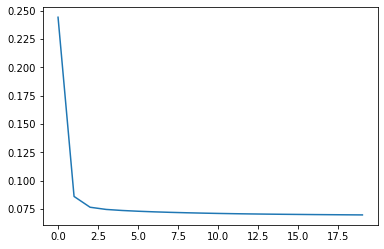

In [35]:
plt.plot(train_model.history['loss'])

In [36]:
Y_pred=model.predict(X_test_ss)

In [37]:
Y_pred

array([[0.02855703],
       [0.00350243],
       [0.0051704 ],
       ...,
       [0.04580465],
       [0.00244361],
       [0.00427651]], dtype=float32)

In [38]:
Y_pred=np.where(Y_pred >= 0.5,1,0)

In [39]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166

